### Name: Murray Heymann


#### Student Number: 15988694

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.linear_model import LogisticRegression as logis
from sklearn.metrics import confusion_matrix

from utils import plot_confusion_matrix
import itertools

### Generate training data

In [3]:
# Training data - two (three?) randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)

# Number of points
N = 1000

# Labels for each cluster
y = np.random.randint(low=0, high=2+1, size = N)

# Mean of each cluster
means = np.array([[-1, 1, -1], [-1, 1, 1],])

# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 3)) + 1

# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])



#### Display the data that you generated to find something like the following:

**Marks: 1**

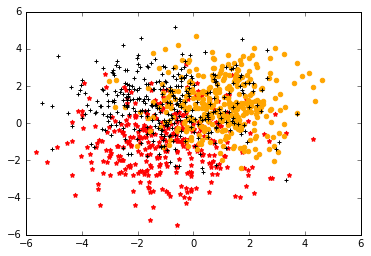

In [4]:
# Plot the data
#split the data into three subsets
set0 = X[:,y == 0]
set1 = X[:,y == 1]
set2 = X[:,y == 2]

#plot the three datasets
plt.scatter(set0[0,:], set0[1,:], color="red", marker=(5,1))
plt.scatter(set1[0,:], set1[1,:], color="orange")
plt.scatter(set2[0,:], set2[1,:], color="black", marker = "+")

#set up the axes and show
plt.axis([-6,6, -6,6])
plt.show()

#boom

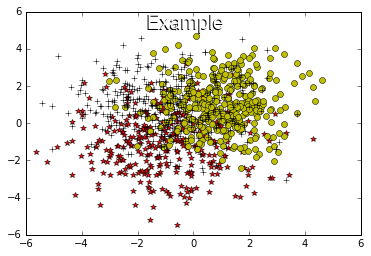

In [5]:
display(Image(filename='./images/wm_dat1.png'))

## Fit the training data to the scikit-learn logistic regression classifier

The image above shows that there is considerable overlap between the classes. Use your trained classifier to assign all the training data to different classes.

**Print the confusion matrix and also plot it, to get something like the image below:**

**Marks: 1**

[[252  35  50]
 [ 36 249  50]
 [ 73  74 181]]


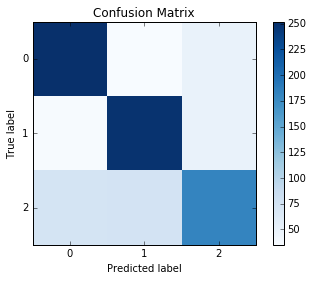

In [6]:
classifier = logis()
#print (X.T.shape, y.shape)
classifier = classifier.fit(X.T, y)

y_pred = classifier.predict(X.T)

confusion_m = confusion_matrix(y, y_pred)
print (confusion_m)

def confusion_plotter(cm, title='Confusion Matrix'):
    plt.figure();
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    shape = cm.shape;
    plt.xticks(np.arange(0, shape[1], 1))
    plt.yticks(np.arange(0, shape[0], 1))

confusion_plotter(confusion_m)
plt.show()

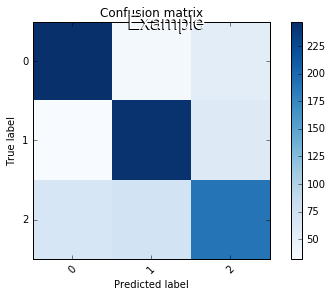

In [7]:
display(Image(filename='./images/wm_confusion.png'))

### Now plot the different classes as predicted by your system. You should get something like: 

**Can you tell from the graph that this is a *linear* classifier?**

**Marks: 1 **

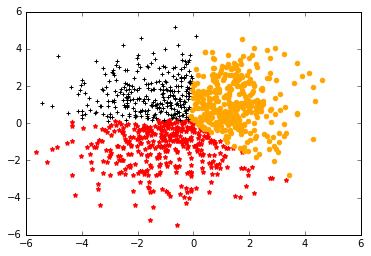

In [8]:
# Plot the data
#split the data into three subsets
set0 = X[:,y_pred == 0]
set1 = X[:,y_pred == 1]
set2 = X[:,y_pred == 2]

#plot the three datasets
plt.scatter(set0[0,:], set0[1,:], color="red", marker=(5,1))
plt.scatter(set1[0,:], set1[1,:], color="orange")
plt.scatter(set2[0,:], set2[1,:], color="black", marker = "+")

#set up the axes and show
plt.axis([-6,6, -6,6])
plt.show()

#boom

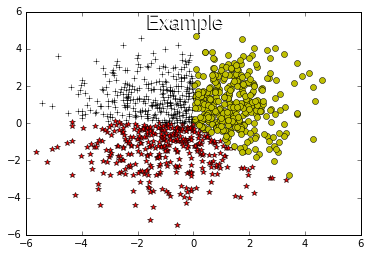

In [9]:
display(Image(filename='./images/wm_dat2.png'))

** Before continuing in the notebook, you will need to install the `lasagne` Python module with "pip3 install --user lasagne" **

# Now classify the MNIST digits

The MNIST database provided in the assignment resources consists of low-resolution (28x28) grayscale images of handwritten digits ($0,1,2,3,4,5,6,7,8,9$). First, you read in a set of training digits and display them interactively to get an idea what they look like. Afterwards, you build and train a softmax classifier using scitkit image. You will then classify the digits in the test set and display the results. Finally, you will display the weights as images.

First load the dataset - for more information about the dataset, see http://yann.lecun.com/exdb/mnist/.

In [19]:
from mnist import load_dataset
X_train, y_train, X_valid, y_valid, X_test, y_test = load_dataset()

# Display the test digits interactively.

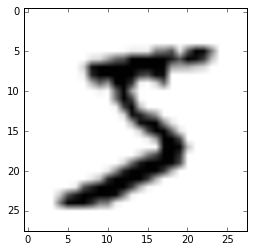

In [11]:
from ipywidgets import interact
def show_digits(k=0):
    """
    Show the first 1000 digits in the training set
    """
    
    plt.imshow(X_train[k][0], cmap=cm.binary)   
    
    plt.show()
    
w = interact(show_digits, k =(0, 1000)) 


# Train the softmax classifier

**Using the training set, build a softmax classifier. Use this classifier to classify the digits in the training set and the test set separately. Print the confusion matrix and also display it as an image for each case to get something like:**

**Marks: 2**

In [39]:
softmax_classifier = logis()

# Flatten the data into vectors
X_train_flat = np.reshape(X_train, (X_train.shape[0], -1))

# Train the classifier
softmax_classifier.fit(X_train_flat, y_train)

print ("Trained classifier")

Trained classifier


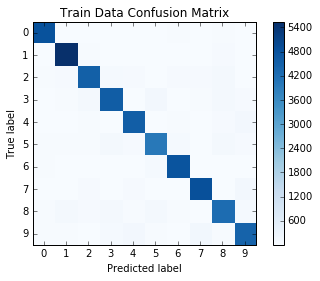

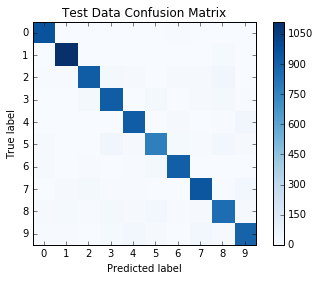

In [40]:
# Predict the training data classes
y_train_pred = softmax_classifier.predict(X_train_flat)

# Create a confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)

# Plot the confustion matrix of the training data
confusion_plotter(cm_train, title="Train Data Confusion Matrix");

# Flatten the test data into vectors
X_test_flat = np.reshape(X_test, (X_test.shape[0], -1))

# Predict the testing data classes and get confusion matrix
y_test_pred = softmax_classifier.predict(X_test_flat)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the testing data
confusion_plotter(cm_test, title="Test Data Confusion Matrix")
plt.show()

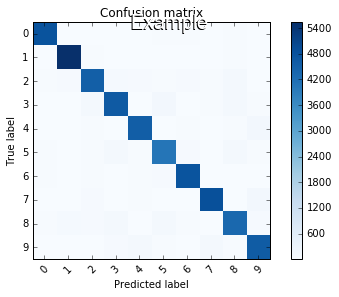

In [41]:
display(Image(filename='./images/wm_confusion2.png'))



### Accuracy

**Calculate the accuracy of your system as a fraction of the correctly classified digits. You should get something like 0.9254.**

**Marks: 1**

In [42]:
# Set up summation variable
train_accuracy = 0.0

# Iterate correctly allocated cells in confusion matrix
for i in range(cm_train.shape[0]):
    train_accuracy = train_accuracy + cm_train[i][i]

# Divide by total number of pictures and print
train_accuracy = train_accuracy / X_train.shape[0]
print ("Training data prediction accuracy:",train_accuracy)

# Set up the summation variable
test_accuracy = 0.0

# Iterate the correctly allocated cells in confusion matrix
for i in range(cm_test.shape[0]):
    test_accuracy = test_accuracy + cm_test[i][i]

# Divide by total number of pictures in test data
test_accuracy = test_accuracy / X_test.shape[0]
print ("Testing data prediction accuracy:", test_accuracy)

Training data prediction accuracy: 0.92724
Testing data prediction accuracy: 0.92


# Extracting the weights and display as images.

**Extract the weights of the softmax classifier and display them as images. Each set of weights should correspond to a specific digit. You should get something like:**

**Marks: 2**

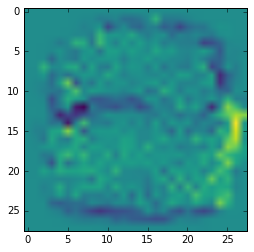

In [51]:
weights = softmax_classifier.coef_
weights1 = np.reshape(weights, (weights.shape[0], 28, 28))
print (weights1.shape)

def show_my_weights(k=0):
    plt.imshow(weights1[k], cmap=cm.viridis)
    plt.show()

show_ws = interact(show_my_weights, k = (0, 9))

In [13]:
from skimage import io
ic = io.ImageCollection('./wm_softmax_mnist_weights/*.png')
def show_weights(k=0):
    plt.imshow(ic[k], cmap=cm.viridis)
    plt.show()

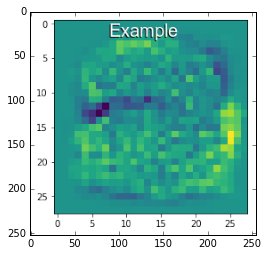

In [14]:
w = interact(show_weights, k =(0, 9)) 

As a comparison, here you can see what the weights look like if you train the softmax classifier using tensorflow (a library dedicated to neural networks and deep learning).

In [15]:
ic_tensor = io.ImageCollection('./wm_tensor_mnist_weights/*.png')
def show_weights_tensor(k=0):
    plt.imshow(ic_tensor[k], cmap=cm.viridis)
    plt.show()

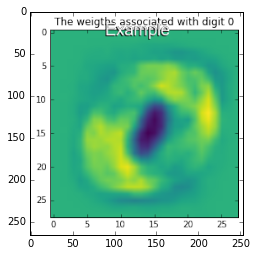

In [16]:
w = interact(show_weights_tensor, k =(0, 9)) 

## Further investigation

**Fit the logistic regression classifier for different values of the regularization parameter - we recommend values evenly spaced on the log scale - and show the corresponding weight images for some digit as the parameter changes.  Explain the changes in the weight images observed.**

**(Insert cells above the plagiarism declaration for this.)**

**Marks: 2**

# Plagiarism declaration

** Add the plagiarism declaration from the University's Plagiarism Policy in this cell.**